In [1]:
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
wildreceipt_path_prefix = r'/home/enestydarealmc/Git/PaddleOCRTraining/IndianDataset/'

In [5]:
wildreceipt_classes_mapping = {
        0: "Ignore",
        1: "Store_name_value",
        2: "Store_name_key",
        3: "Store_addr_value",
        4: "Store_addr_key",
        5: "Tel_value",
        6: "Tel_key",
        7: "Date_value",
        8: "Date_key",
        9: "Time_value",
        10: "Time_key",
        11: "Prod_item_value",
        12: "Prod_item_key",
        13: "Prod_quantity_value",
        14: "Prod_quantity_key",
        15: "Prod_price_value",
        16: "Prod_price_key",
        17: "Subtotal_value",
        18: "Subtotal_key",
        19: "Tax_value",
        20: "Tax_key",
        21: "Tips_value",
        22: "Tips_key",
        23: "Total_value",
        24: "Total_key",
        25: "Others"
    }

def visualize_bounding_boxes(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    for line in lines:
        data = json.loads(line.strip())
        file_name = wildreceipt_path_prefix + data['file_name']
        annotations = data['annotations']
        image = plt.imread(file_name)

        # Create figure and axes
        fig, ax = plt.subplots(figsize=(20,10))
        ax.imshow(image)

        # Plot bounding boxes and labels
        for annotation in annotations:
            box = annotation['box']
            text = annotation['text']
            label = wildreceipt_classes_mapping[annotation['label']]

            # Extract coordinates from the box
            x1, y1, x2, y2, x3, y3, x4, y4 = box

            # Create a rectangle patch
            rect = patches.Polygon([(x1, y1), (x2, y2), (x3, y3), (x4, y4)], linewidth=1, edgecolor='r', facecolor='none')

            # Add the rectangle to the axes
            ax.add_patch(rect)

            # Add label text
            ax.text(x1, y1, text, color='b', fontsize=8, verticalalignment='top')

        
        # Show the plot
        plt.axis('off')
        # fig.savefig(r'wildreceipt_visualization/'+data['file_name'])
        plt.show()
        plt.close()


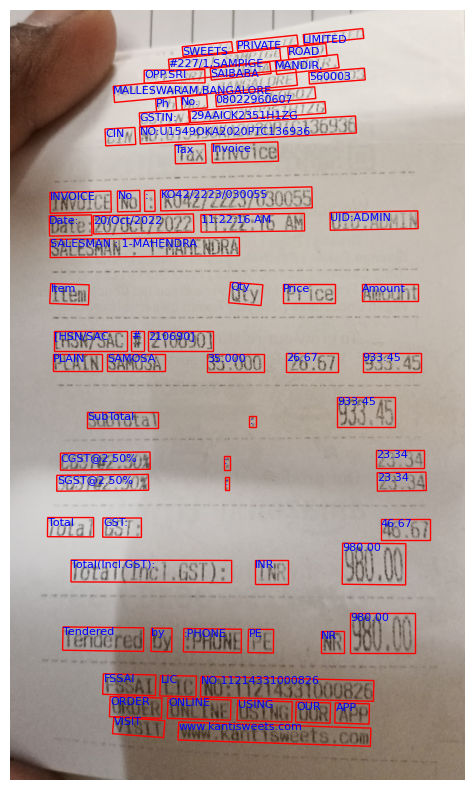

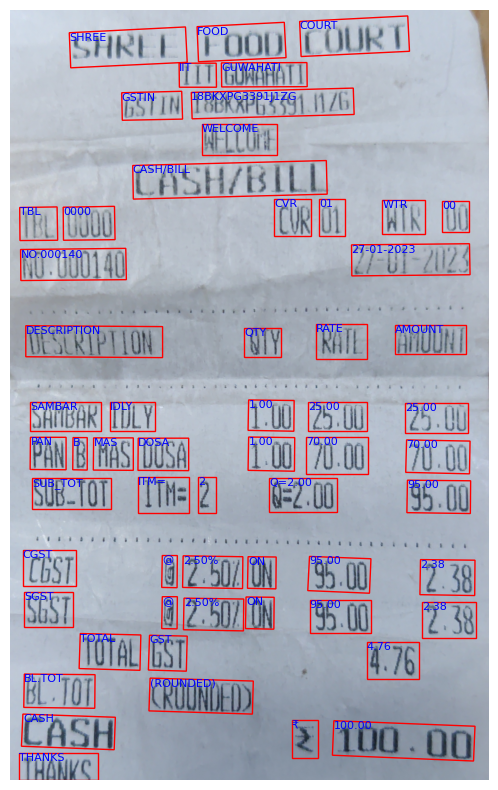

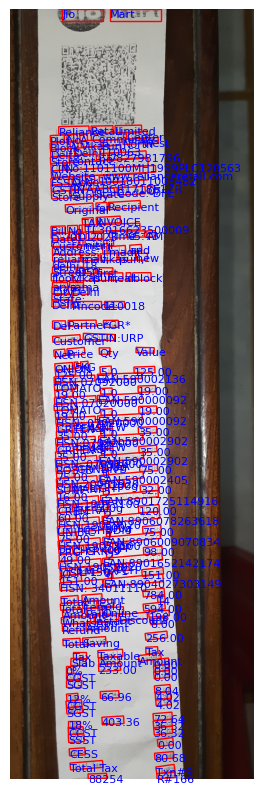

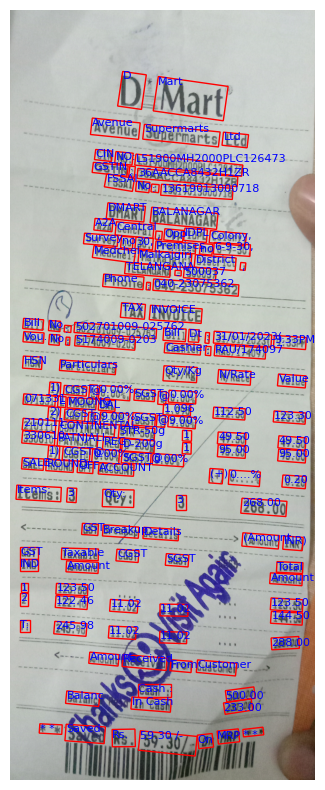

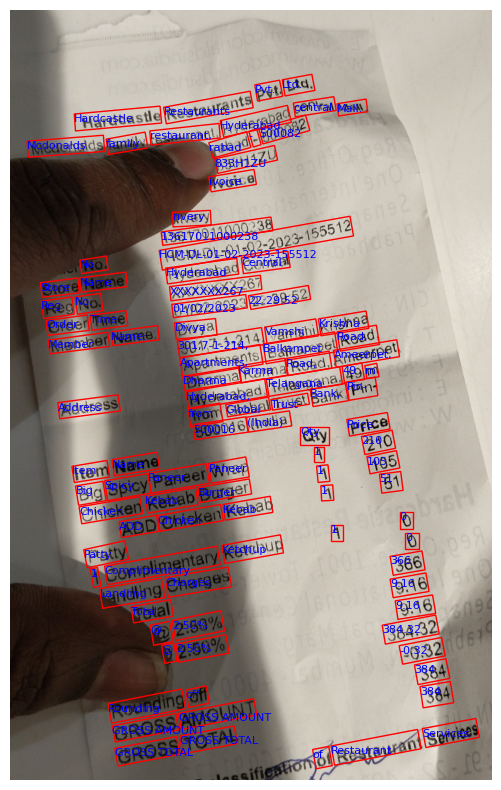

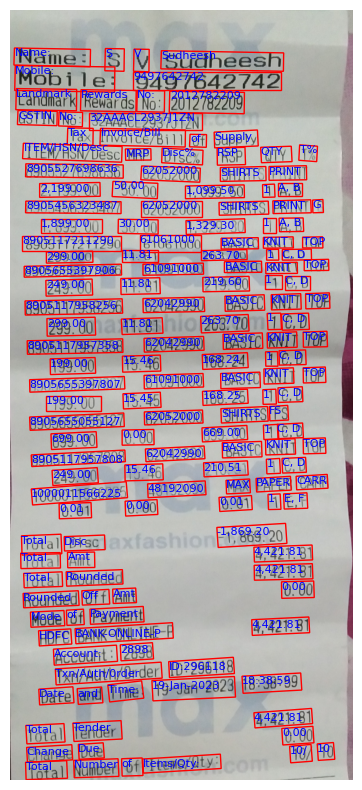

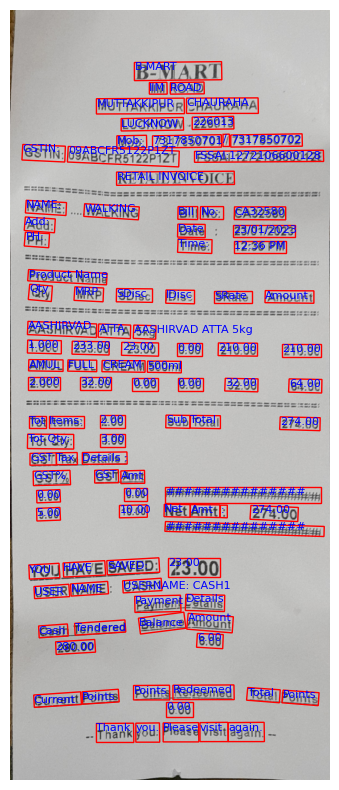

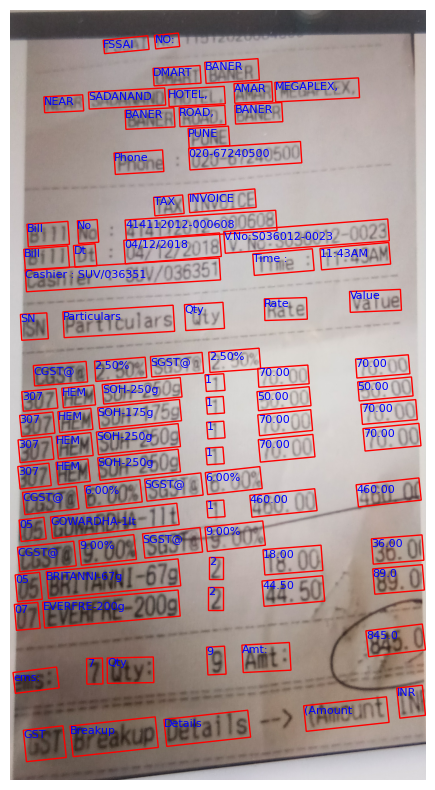

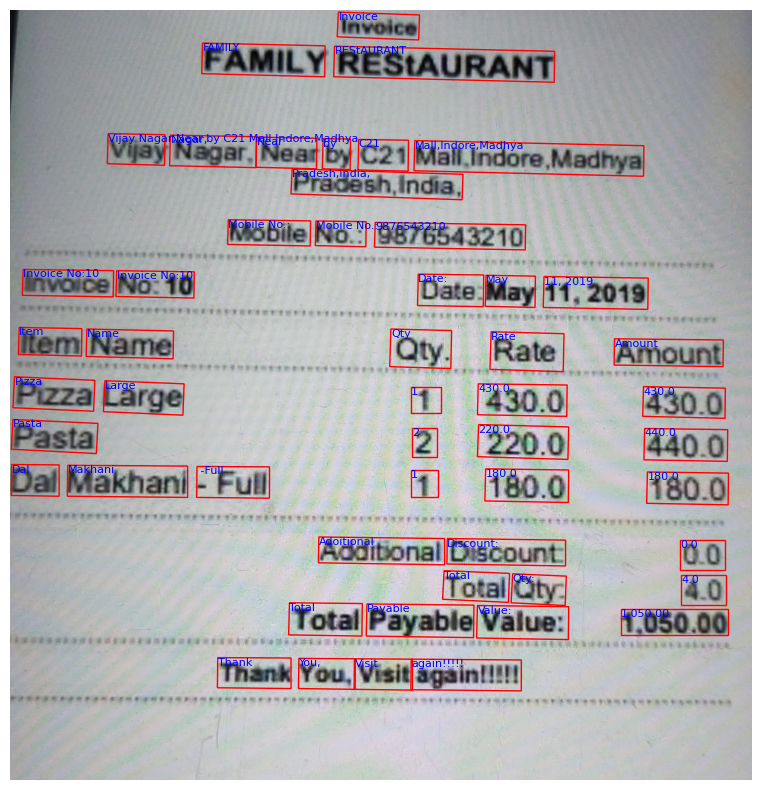

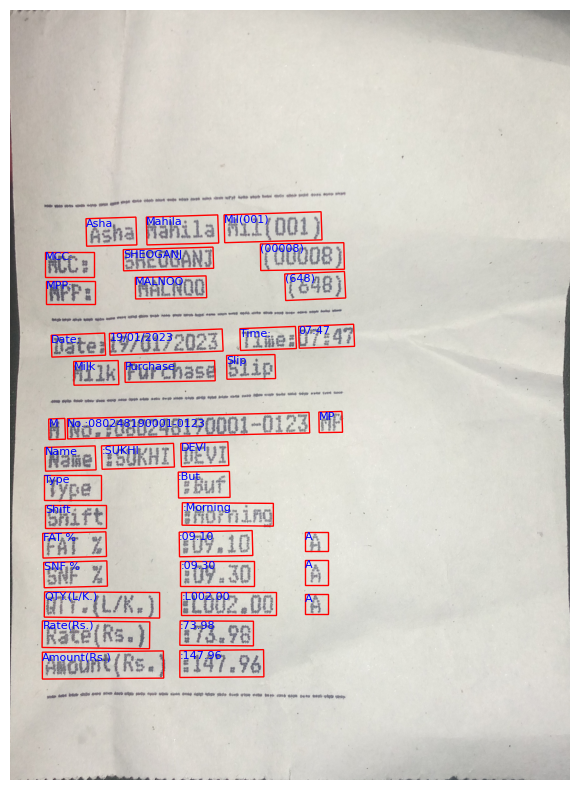

In [6]:
# Example usage
file_path = wildreceipt_path_prefix + r'indian_dataset_10.txt'
visualize_bounding_boxes(file_path)